***Домашнее задание "Визуализация данных в Python"***

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [289]:
# возьму свои данные о продажах по полам
source = pd.read_csv('orders_sections_genders_count_.csv',sep=';',header=0,names=['Section', 'Gender', 'O_Count'])
# разделяю на два назных DF
source_male = source[source['Gender']=='M'].sort_values('O_Count', ascending=False).head(15)
source_famale = source[source['Gender']=='F'].sort_values('O_Count', ascending=False).head(15)

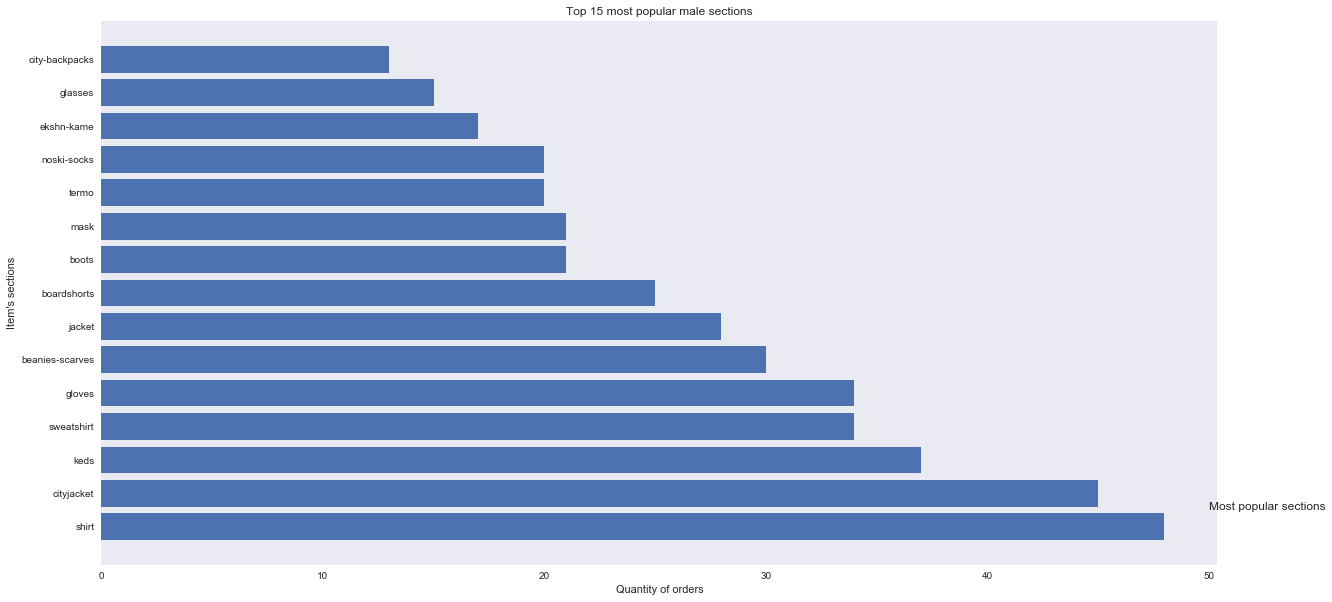

In [290]:
# посмотрим самые популярные категории товаров по полам
plt.barh(source_male['Section'], source_male['O_Count'])
plt.xlabel('Quantity of orders')
plt.ylabel("Item's sections")
plt.title('Top 15 most popular male sections')
plt.text(50, 0.5, 'Most popular sections')
plt.grid()

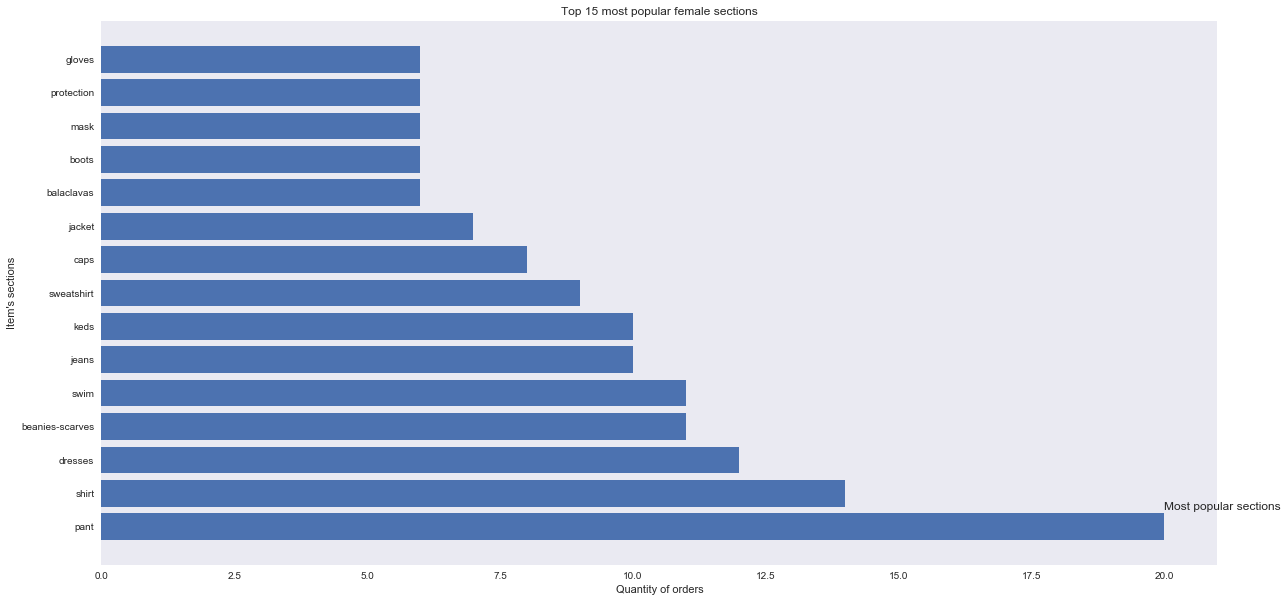

In [291]:
plt.barh(source_famale['Section'], source_famale['O_Count'])
plt.xlabel('Quantity of orders')
plt.ylabel("Item's sections")
plt.title('Top 15 most popular female sections')
plt.text(20, 0.5, 'Most popular sections')
plt.grid()

In [38]:
source_all_15 = source.sort_values('O_Count', ascending=False).head(50)
gender_sections = source_all_15.groupby(['Section','Gender']).sum()

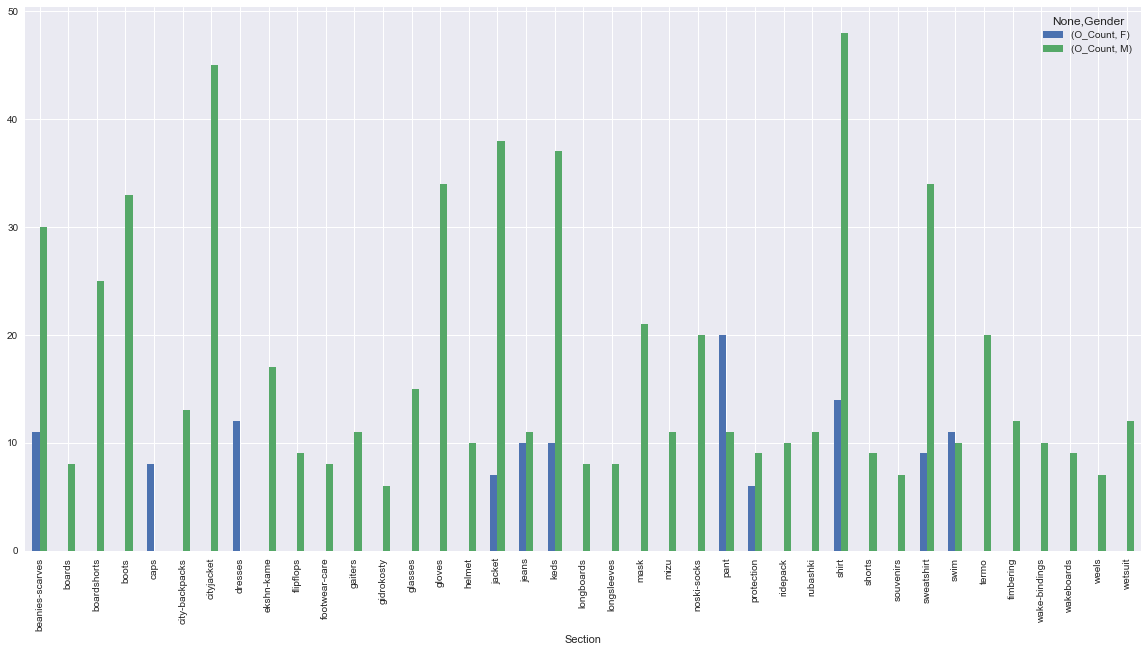

In [292]:
# сравним количество продаж по разделам у Ж и М
gender_sections = gender_sections.loc[(gender_sections.index.get_level_values(0))]
gender_sections.unstack('Gender').plot(kind='bar')

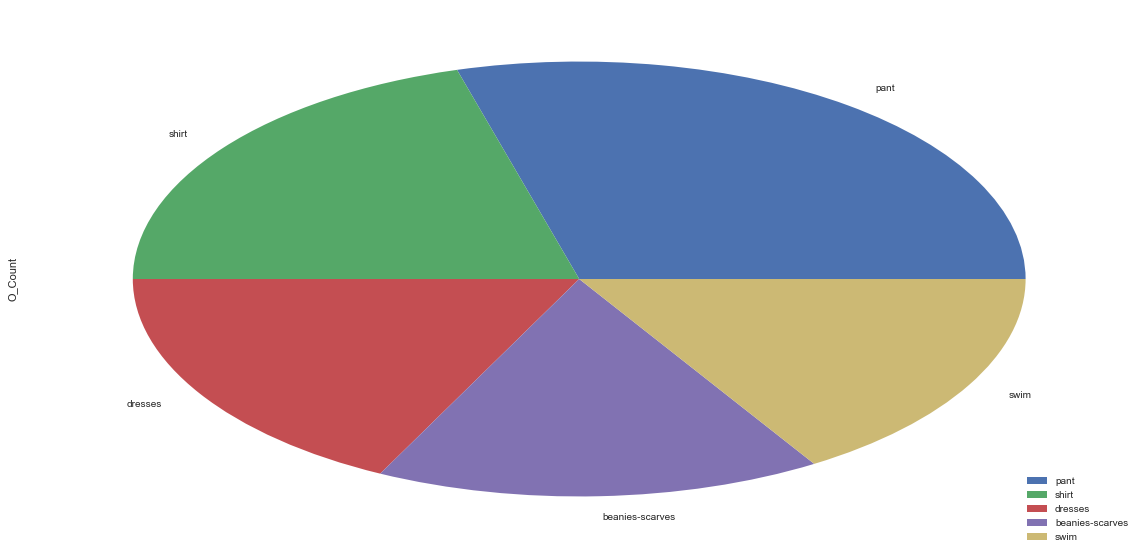

In [293]:
# посмотрим соотношение самых популярных категорий товаров у Ж
source_famale = source_famale.groupby(['Section']).sum().sort_values(by='O_Count', ascending=False).head(5)
source_famale.plot(kind='pie', y='O_Count')

In [341]:
import seaborn as sns

In [6]:
# возьмем новые данные продажи по месяцам в категориях
df = pd.read_csv('orders_sections_by_month_count_.csv',sep=';',header=0,names=['Section', 'Month', 'O_Count'])

In [7]:
df11 = df.groupby(['Section','Month']).sum().unstack('Month', fill_value=0)
df11.head()

O_Count                                               \
Month                       1    2   3   4   5   6    7    8   9    10   11   
Section                                                                       
accessories                  9   10   5  10  21  33   39   47  14   28   32   
accessory-cases             18   26  27  16  20  39   43   94  25   13   34   
acses                       86  108  60  66  69  72  109  394  78  120  141   
aksessuaridliaballonov       3    4   2   3   4   7   11    8   2    2    2   
aksessuary                   7    4   9   2   0   1    0    3   3    2    7   

                             
Month                    12  
Section                      
accessories              24  
accessory-cases          25  
acses                   135  
aksessuaridliaballonov    2  
aksessuary                9

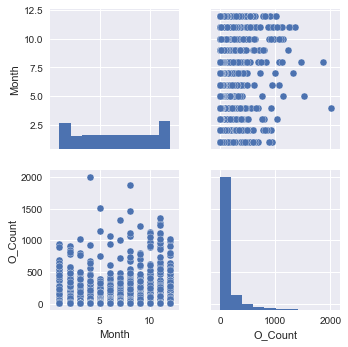

In [352]:
#
sns_plot = sns.pairplot(df[['Section', 'Month', 'O_Count']])
sns_plot

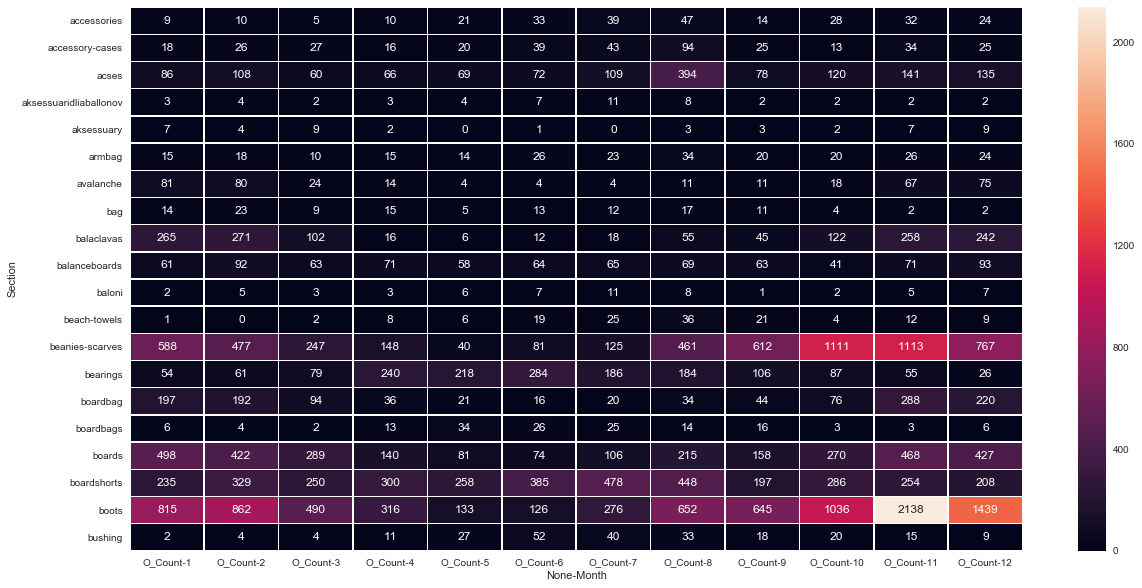

In [359]:
# на тепловой карте можно увидеть в какие месяцы самые большие продажи у каких категорий товаров
df11 = df11.head(20)
sns.heatmap(df11, annot=True, fmt="d", linewidths=.5)

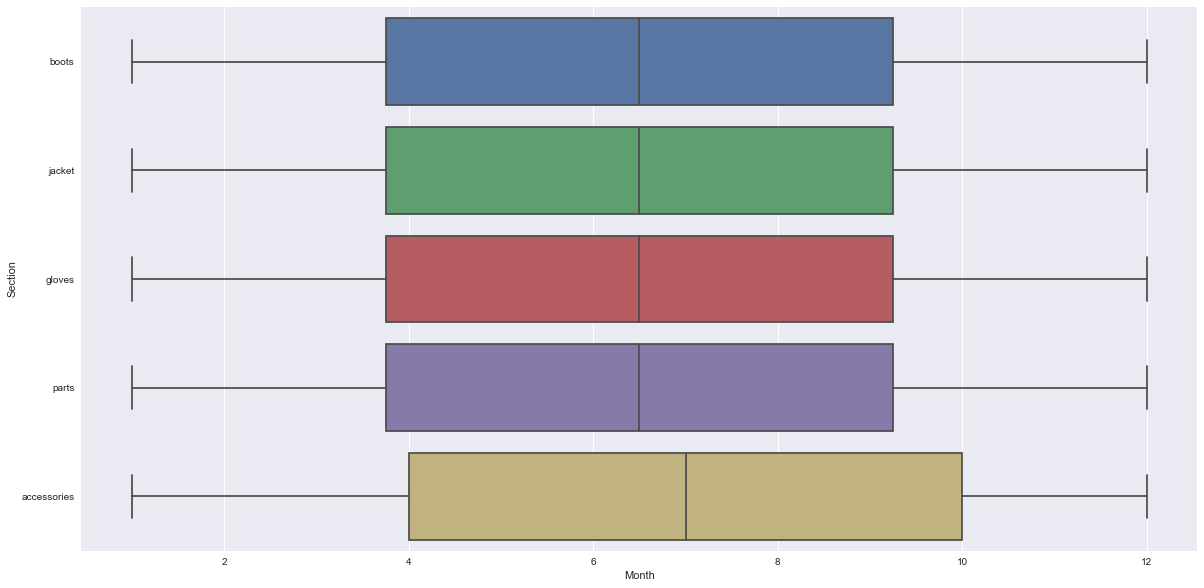

In [360]:
# сравнение самых продаваемых категорий 
top_sections = df.Section.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="Month", y="Section", data=df[df.Section.isin(top_sections)])

In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

In [9]:
df12 = df.groupby(['Section','Month']).sum().unstack('Month', fill_value=0)
df12.head()
df12.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Index(['accessories', 'accessory-cases', 'acses', 'aksessuaridliaballonov',
       'aksessuary', 'armbag', 'avalanche', 'bag', 'balaclavas',
       'balanceboards',
       ...
       'wallets', 'warmboots', 'waterhelmet', 'wax', 'wearwinter', 'weels',
       'wetsuit', 'wheels', 'zacshitadlialongborda', 'zhiletki'],
      dtype='object', name='Section', length=135)

In [13]:
# сравним продажи по категориям в Марте, Ноябрь и Декабрь
trace0 = go.Scatter(
    x=df12.index,
    y=df12.Mar,
    name='Mar'
)

trace1 = go.Scatter(
    x=df12.index,
    y=df12.Nov,
    name='Nov'
)

trace2 = go.Scatter(
    x=df12.index,
    y=df12.Dec,
    name='Dec'
)
  
data = [trace0, trace1, trace2]
layout = {'title': 'Statistics of orders by categories'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)